# 6.1 RNN의 문제점

6.1.3 기울기 소실과 기울기 폭발의 원인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N, H))
np.random.seed(3)
Wh = np.random.randn(H, H)

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N # 미니배치(N개)의 평균 L2 Norm
    norm_list.append(norm)

In [62]:
np.random.randn(H, H), np.sqrt(np.sum((np.random.randn(H, H))**2))

(array([[-0.52297163, -0.06357308, -0.24977211],
        [ 0.48579018,  0.48573721,  0.25789698],
        [ 1.34407129, -0.15851092, -1.05080794]]),
 3.4748373028244255)

In [2]:
norm_list

[2.4684068094579303,
 3.335704974161037,
 4.783279375373183,
 6.2795873320876145,
 8.080776465019055,
 10.25116303229294,
 12.9360635066099,
 16.276861327786712,
 20.454829618345983,
 25.688972842084684,
 32.25315718048336,
 40.48895641683869,
 50.824407307019094,
 63.79612654485427,
 80.07737014308985,
 100.51298922051251,
 126.16331847536827,
 158.3592064825883,
 198.77107967611957,
 249.495615421267]

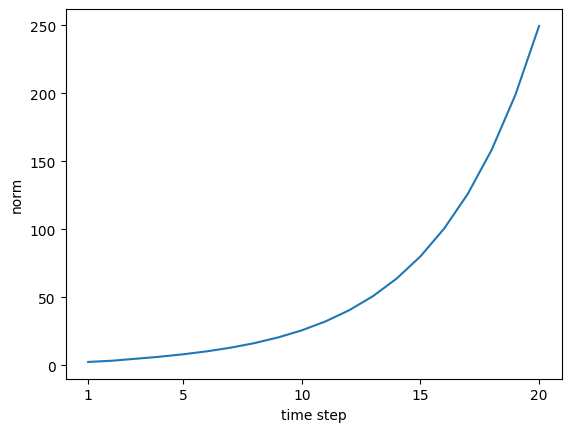

In [4]:
# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()


기울기 폭발

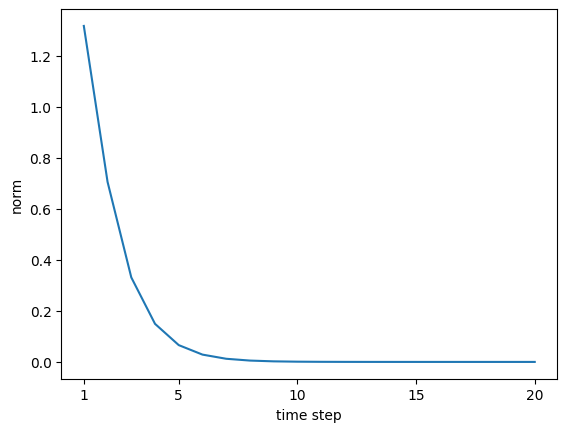

In [147]:
N = 2 # 미니배치 크기
H = 3 # 은닉 상태 벡터의 차원수
T = 20 # 시계열 데이터의 길이

dh = np.ones((N, H))
# np.random.seed(3)
Wh = np.random.randn(H, H)

# Wh = np.random.randn(H, H)       # 변경 전
Wh = np.random.randn(H, H) * 0.5 # 변경 후

norm_list = []
for t in range(T):
    dh = np.matmul(dh, Wh.T)
    norm = np.sqrt(np.sum(dh**2)) / N # 미니배치(N개)의 평균 L2 Norm
    norm_list.append(norm)

# 그래프 그리기
plt.plot(np.arange(len(norm_list)), norm_list)
plt.xticks([0, 4, 9, 14, 19], [1, 5, 10, 15, 20])
plt.xlabel('time step')
plt.ylabel('norm')
plt.show()

6.1.4 기울기 폭발 대책

In [150]:
import numpy as np

dW1 = np.random.rand(3, 3) * 10
dW2 = np.random.rand(3, 3) * 10
grads = [dW1, dW2]
max_norm = 5.0 # threshold

def clip_grads(grads, max_norm):
    total_norm = 0
    for grad in grads:
        total_norm += np.sum(grad**2)
    total_norm = np.sqrt(total_norm)

    rate = max_norm / (total_norm + 1e-6)
    if rate < 1:
        for grad in grads:
            grad *= rate

print('before:', dW1.flatten())
clip_grads(grads, max_norm)
print('after:', dW1.flatten())

before: [6.75996587 4.4591411  6.71570248 4.60368504 7.80003222 1.13444084
 5.08157429 8.7148954  9.27529276]
after: [1.34437266 0.88680143 1.33556988 0.91554727 1.55121347 0.22560931
 1.0105864  1.73315478 1.84460251]
